In [1]:
%pylab inline
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import pandas as pd
import mdtraj as md
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
from MDAnalysis.lib.distances import calc_angles
from MDAnalysis.lib.distances import calc_bonds
from glob import glob
import numpy as np
import pyemma.coordinates as coor
import seaborn as sns
import multiprocessing
import pickle

import warnings

warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
trajfile1 = '/www/yang/R_open/combine_ca.xtc'
topfile1 = '/www/yang/R_open/new_R-bound.pdb'

In [3]:
top_h = md.load(topfile1)
traj = md.load(trajfile1,  top=top_h)

rg = md.compute_rg(traj)

In [7]:
rg

array([2.9446666 , 2.97274849, 2.96748614, ..., 2.85453017, 2.83245889,
       2.84031112])

In [6]:
rg.shape

(100001,)

In [8]:
sasa = md.shrake_rupley(traj,mode='atom')

In [12]:
sasa

array([[0.981198  , 0.72331905, 0.769863  , ..., 0.59626645, 0.7119975 ,
        0.9786821 ],
       [0.9723687 , 0.6965541 , 0.7683156 , ..., 0.5882109 , 0.7367942 ,
        0.98871887],
       [0.984937  , 0.7090999 , 0.7758613 , ..., 0.6674514 , 0.745631  ,
        0.9799258 ],
       ...,
       [0.9849434 , 0.74563897, 0.74061024, ..., 0.56679666, 0.750628  ,
        0.95220673],
       [0.97614723, 0.74061024, 0.7418619 , ..., 0.56930465, 0.7368427 ,
        0.95849484],
       [0.9773941 , 0.7380881 , 0.7431214 , ..., 0.5617601 , 0.71166646,
        0.9735981 ]], dtype=float32)

In [11]:
sasa.shape

(100001, 479)

In [17]:
test_top_h = md.load("/www/yang/R_open/r2_bound.pdb")
test_traj = md.load("/www/yang/R_open/r1/pro.xtc",  top=test_top_h)

test_rg = md.compute_rg(test_traj)

In [18]:
print(test_rg)
print(test_rg.shape)

[2.9485156  2.97797628 2.97326597 ... 2.79448538 2.81075456 2.81913358]
(10001,)


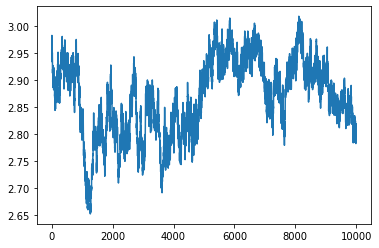

In [19]:
plot(test_rg)

<Axes: ylabel='Probability'>

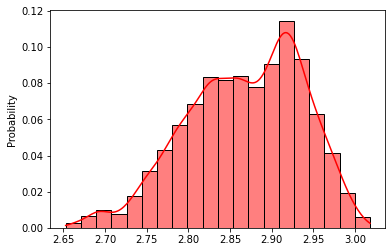

In [69]:
sns.histplot(test_rg, kde=True, stat='probability', color='red', bins=20)

<Axes: ylabel='Probability'>

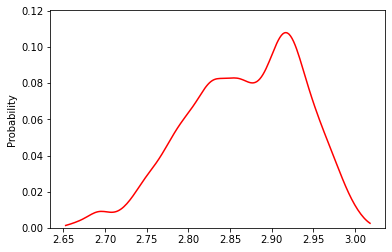

In [73]:
sns.histplot(test_rg, kde=True, stat='probability', color='red',bins=20,shrink=0)

<Axes: ylabel='Probability'>

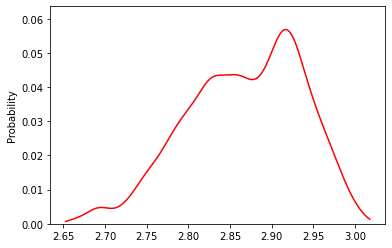

In [71]:
sns.histplot(test_rg, kde=True, stat='probability', color='red',shrink=0)

<Axes: ylabel='Density'>

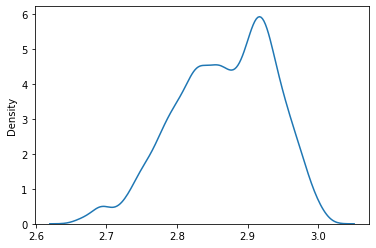

In [52]:
sns.kdeplot(test_rg,thresh=[0,1])

## RMSD

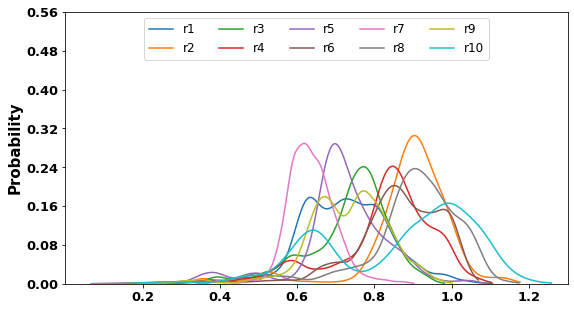

In [8]:
# R_open
sns.set_context({'figure.figsize':[9, 5]})
for i in range(1,11):
    one_top_h = md.load("/www/yang/R_open/r2_bound.pdb")
    one_traj = md.load("/www/yang/R_open/r" +str(i) + "/pro.xtc",  top=one_top_h)
    one_top_h_bb = one_top_h.topology.select('backbone')
    one_rmsd = md.rmsd(one_traj, one_top_h, atom_indices=one_top_h_bb)
    sns.histplot(one_rmsd, kde=True, stat='probability',bins=20,shrink=0)
plt.legend(["r1","r2","r3","r4","r5",
            "r6","r7","r8","r9","r10"],
           loc="upper center",ncol=5,fontsize=12)
plt.ylabel("Probability",weight='bold',fontsize=15)
plt.xticks([0.2,0.4,0.6,0.8,1.0,1.2],weight='bold',fontsize=13)
plt.yticks([0.0,0.08,0.16,0.24,0.32,0.40,0.48,0.56],weight='bold',fontsize=13)
plt.xlim(0.0,1.3)
plt.savefig("/home/dldx/R-H/code/classification/ML/plot/fig6/B/R_open_rmsd.jpg",dpi=900)

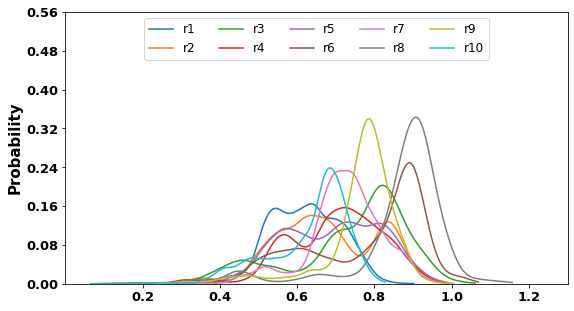

In [9]:
# H_open
sns.set_context({'figure.figsize':[9, 5]})
for i in range(1,11):
    one_top_h = md.load("/www/yang/H_open/H-bound.pdb")
    one_traj = md.load("/www/yang/H_open/r" +str(i) + "/pro.xtc",  top=one_top_h)
    one_top_h_bb = one_top_h.topology.select('backbone')
    one_rmsd = md.rmsd(one_traj, one_top_h, atom_indices=one_top_h_bb)
    sns.histplot(one_rmsd, kde=True, stat='probability',bins=20,shrink=0)
plt.legend(["r1","r2","r3","r4","r5",
            "r6","r7","r8","r9","r10"],
           loc="upper center",ncol=5,fontsize=12)
plt.ylabel("Probability",weight='bold',fontsize=15)
plt.xticks([0.2,0.4,0.6,0.8,1.0,1.2],weight='bold',fontsize=13)
plt.yticks([0.0,0.08,0.16,0.24,0.32,0.40,0.48,0.56],weight='bold',fontsize=13)
plt.xlim(0.0,1.3)
plt.savefig("/home/dldx/R-H/code/classification/ML/plot/fig6/B/H_open_rmsd.jpg",dpi=900)

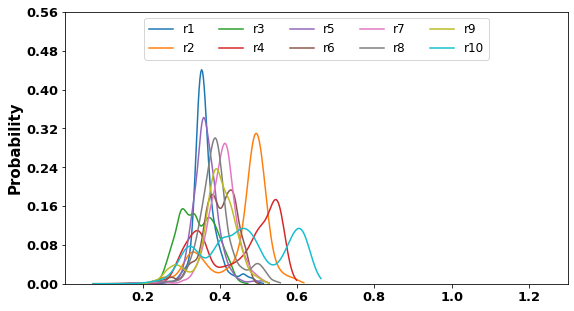

In [10]:
# R_close
sns.set_context({'figure.figsize':[9, 5]})
for i in range(1,11):
    one_top_h = md.load("/www/yang/R_close/r2_unbound.pdb")
    one_traj = md.load("/www/yang/R_close/r" +str(i) + "/pro.xtc",  top=one_top_h)
    one_top_h_bb = one_top_h.topology.select('backbone')
    one_rmsd = md.rmsd(one_traj, one_top_h, atom_indices=one_top_h_bb)
    sns.histplot(one_rmsd, kde=True, stat='probability',bins=20,shrink=0)
plt.legend(["r1","r2","r3","r4","r5",
            "r6","r7","r8","r9","r10"],
           loc="upper center",ncol=5,fontsize=12)
plt.ylabel("Probability",weight='bold',fontsize=15)
plt.xticks([0.2,0.4,0.6,0.8,1.0,1.2],weight='bold',fontsize=13)
plt.yticks([0.0,0.08,0.16,0.24,0.32,0.40,0.48,0.56],weight='bold',fontsize=13)
plt.xlim(0.0,1.3)
plt.savefig("/home/dldx/R-H/code/classification/ML/plot/fig6/B/R_close_rmsd.jpg",dpi=900)

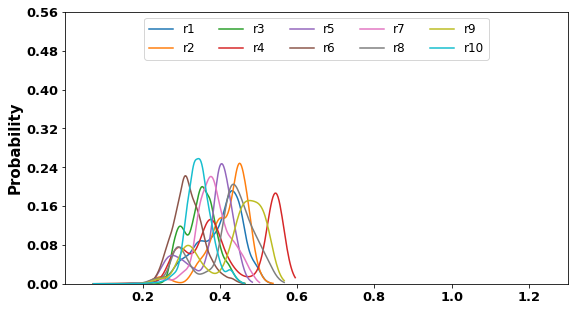

In [11]:
# H_close
sns.set_context({'figure.figsize':[9, 5]})
for i in range(1,11):
    one_top_h = md.load("/www/yang/H_close/H-unbound.pdb")
    one_traj = md.load("/www/yang/H_close/r" +str(i) + "/pro.xtc",  top=one_top_h)
    one_top_h_bb = one_top_h.topology.select('backbone')
    one_rmsd = md.rmsd(one_traj, one_top_h, atom_indices=one_top_h_bb)
    sns.histplot(one_rmsd, kde=True, stat='probability',bins=20,shrink=0)
plt.legend(["r1","r2","r3","r4","r5",
            "r6","r7","r8","r9","r10"],
           loc="upper center",ncol=5,fontsize=12)
plt.ylabel("Probability",weight='bold',fontsize=15)
plt.xticks([0.2,0.4,0.6,0.8,1.0,1.2],weight='bold',fontsize=13)
plt.yticks([0.0,0.08,0.16,0.24,0.32,0.40,0.48,0.56],weight='bold',fontsize=13)
plt.xlim(0.0,1.3)
plt.savefig("/home/dldx/R-H/code/classification/ML/plot/fig6/B/H_close_rmsd.jpg",dpi=900)

## Rg

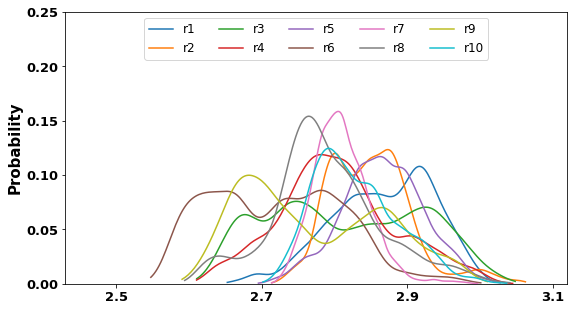

In [12]:
# R_open
sns.set_context({'figure.figsize':[9, 5]})
for i in range(1,11):
    one_top_h = md.load("/www/yang/R_open/r2_bound.pdb")
    one_traj = md.load("/www/yang/R_open/r" +str(i) + "/pro.xtc",  top=one_top_h)
    one_rg = md.compute_rg(one_traj)
    sns.histplot(one_rg, kde=True, stat='probability',bins=20,shrink=0)
plt.legend(["r1","r2","r3","r4","r5",
            "r6","r7","r8","r9","r10"],
           loc="upper center",ncol=5,fontsize=12)

plt.ylabel("Probability",weight='bold',fontsize=15)
plt.xticks([2.5,2.7,2.9,3.1],weight='bold',fontsize=13)
plt.yticks([0.0,0.05,0.10,0.15,0.20,0.25],weight='bold',fontsize=13)
plt.xlim(2.43,3.12)
plt.savefig("/home/dldx/R-H/code/classification/ML/plot/fig6/C/R_open_rg.jpg",dpi=900)

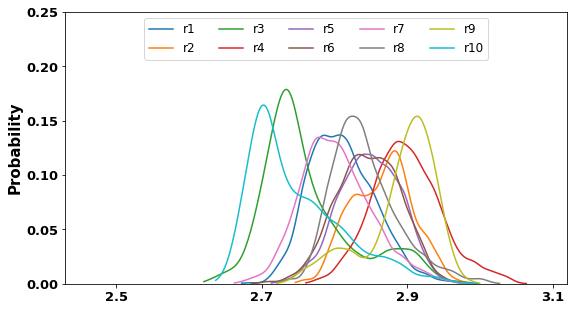

In [13]:
# H_open
sns.set_context({'figure.figsize':[9, 5]})
for i in range(1,11):
    one_top_h = md.load("/www/yang/H_open/H-bound.pdb")
    one_traj = md.load("/www/yang/H_open/r" +str(i) + "/pro.xtc",  top=one_top_h)
    one_rg = md.compute_rg(one_traj)
    sns.histplot(one_rg, kde=True, stat='probability',bins=20,shrink=0)
plt.legend(["r1","r2","r3","r4","r5",
            "r6","r7","r8","r9","r10"],
           loc="upper center",ncol=5,fontsize=12)

plt.ylabel("Probability",weight='bold',fontsize=15)
plt.xticks([2.5,2.7,2.9,3.1],weight='bold',fontsize=13)
plt.yticks([0.0,0.05,0.10,0.15,0.20,0.25],weight='bold',fontsize=13)
plt.xlim(2.43,3.12)
plt.savefig("/home/dldx/R-H/code/classification/ML/plot/fig6/C/H_open_rg.jpg",dpi=900)

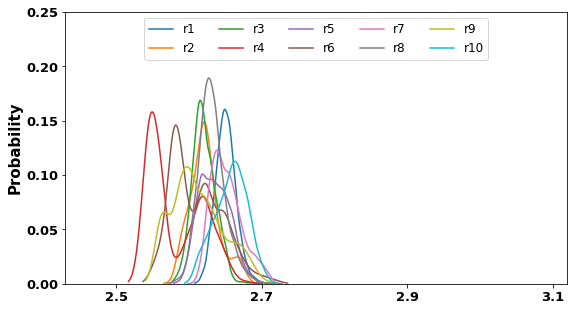

In [14]:
# R_close
sns.set_context({'figure.figsize':[9, 5]})
for i in range(1,11):
    one_top_h = md.load("/www/yang/R_close/r2_unbound.pdb")
    one_traj = md.load("/www/yang/R_close/r" +str(i) + "/pro.xtc",  top=one_top_h)
    one_rg = md.compute_rg(one_traj)
    sns.histplot(one_rg, kde=True, stat='probability',bins=20,shrink=0)
plt.legend(["r1","r2","r3","r4","r5",
            "r6","r7","r8","r9","r10"],
           loc="upper center",ncol=5,fontsize=12)

plt.ylabel("Probability",weight='bold',fontsize=15)
plt.xticks([2.5,2.7,2.9,3.1],weight='bold',fontsize=13)
plt.yticks([0.0,0.05,0.10,0.15,0.20,0.25],weight='bold',fontsize=13)
plt.xlim(2.43,3.12)
plt.savefig("/home/dldx/R-H/code/classification/ML/plot/fig6/C/R_close_rg.jpg",dpi=900)

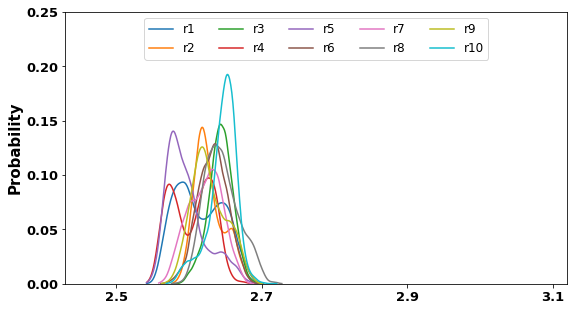

In [15]:
# H_close
sns.set_context({'figure.figsize':[9, 5]})
for i in range(1,11):
    one_top_h = md.load("/www/yang/H_close/H-unbound.pdb")
    one_traj = md.load("/www/yang/H_close/r" +str(i) + "/pro.xtc",  top=one_top_h)
    one_rg = md.compute_rg(one_traj)
    sns.histplot(one_rg, kde=True, stat='probability',bins=20,shrink=0)
plt.legend(["r1","r2","r3","r4","r5",
            "r6","r7","r8","r9","r10"],
           loc="upper center",ncol=5,fontsize=12)

plt.ylabel("Probability",weight='bold',fontsize=15)
plt.xticks([2.5,2.7,2.9,3.1],weight='bold',fontsize=13)
plt.yticks([0.0,0.05,0.10,0.15,0.20,0.25],weight='bold',fontsize=13)
plt.xlim(2.43,3.12)
plt.savefig("/home/dldx/R-H/code/classification/ML/plot/fig6/C/H_close_rg.jpg",dpi=900)

## SASA

## SASA数据处理

### 1、算出4个状态中每条轨迹的单个蛋白中的所有原子SASA值

In [2]:
R_open = []
for i in range(1,11):
    one_top_h = md.load("/www/yang/R_open/r2_bound.pdb")
    one_traj = md.load("/www/yang/R_open/r" +str(i) + "/pro.xtc",  top=one_top_h)
    one_sasa = md.shrake_rupley(one_traj,mode='atom')
    R_open.append(one_sasa)
pickle.dump(R_open,  open('/home/dldx/R-H/code/classification/ML/plot/fig6/D/R_open_sasa.pkl', 'wb'))

In [2]:
H_open = []
for i in range(1,11):
    one_top_h = md.load("/www/yang/H_open/H-bound.pdb")
    one_traj = md.load("/www/yang/H_open/r" +str(i) + "/pro.xtc",  top=one_top_h)
    one_sasa = md.shrake_rupley(one_traj,mode='atom')
    H_open.append(one_sasa)
pickle.dump(H_open,  open('/home/dldx/R-H/code/classification/ML/plot/fig6/D/H_open_sasa.pkl', 'wb'))

In [2]:
R_close = []
for i in range(1,11):
    one_top_h = md.load("/www/yang/R_close/r2_unbound.pdb")
    one_traj = md.load("/www/yang/R_close/r" +str(i) + "/pro.xtc",  top=one_top_h)
    one_sasa = md.shrake_rupley(one_traj,mode='atom')
    R_close.append(one_sasa)
pickle.dump(R_close,  open('/home/dldx/R-H/code/classification/ML/plot/fig6/D/R_close_sasa.pkl', 'wb'))

In [2]:
H_close = []
for i in range(1,11):
    one_top_h = md.load("/www/yang/H_close/H-unbound.pdb")
    one_traj = md.load("/www/yang/H_close/r" +str(i) + "/pro.xtc",  top=one_top_h)
    one_sasa = md.shrake_rupley(one_traj,mode='atom')
    H_close.append(one_sasa)
pickle.dump(H_close,  open('/home/dldx/R-H/code/classification/ML/plot/fig6/D/H_close_sasa.pkl', 'wb'))


### 2、将单个蛋白所有原子SASA值求和，也就是单个蛋白的SASA

In [8]:
r_o = pickle.load(open('/home/dldx/R-H/code/classification/ML/plot/fig6/D/R_open_sasa.pkl','rb'))

r_o_traj =[]
for i in range(0,10):
    one_traj =[]
    for j in range(0,10001):
        one_traj.append(np.sum(r_o[i][j]))
    r_o_traj.append(one_traj) 
pickle.dump(r_o_traj,  open('/home/dldx/R-H/code/classification/ML/plot/fig6/D/end_r_o_sasa.pkl', 'wb'))

In [10]:
h_o = pickle.load(open('/home/dldx/R-H/code/classification/ML/plot/fig6/D/H_open_sasa.pkl','rb'))

h_o_traj =[]
for i in range(0,10):
    one_traj =[]
    for j in range(0,10001):
        one_traj.append(np.sum(h_o[i][j]))
    h_o_traj.append(one_traj) 
pickle.dump(h_o_traj,  open('/home/dldx/R-H/code/classification/ML/plot/fig6/D/end_h_o_sasa.pkl', 'wb'))

In [2]:
r_c = pickle.load(open('/home/dldx/R-H/code/classification/ML/plot/fig6/D/R_close_sasa.pkl','rb'))

r_c_traj =[]
for i in range(0,10):
    one_traj =[]
    for j in range(0,10001):
        one_traj.append(np.sum(r_c[i][j]))
    r_c_traj.append(one_traj) 
pickle.dump(r_c_traj,  open('/home/dldx/R-H/code/classification/ML/plot/fig6/D/end_r_c_sasa.pkl', 'wb'))

In [3]:
h_c = pickle.load(open('/home/dldx/R-H/code/classification/ML/plot/fig6/D/H_close_sasa.pkl','rb'))

h_c_traj =[]
for i in range(0,10):
    one_traj =[]
    for j in range(0,10001):
        one_traj.append(np.sum(h_c[i][j]))
    h_c_traj.append(one_traj) 
pickle.dump(h_c_traj,  open('/home/dldx/R-H/code/classification/ML/plot/fig6/D/end_h_c_sasa.pkl', 'wb'))

## SASA数值统计

In [16]:
r_o = pickle.load(open('/home/dldx/R-H/code/classification/ML/plot/fig6/D/end_r_o_sasa.pkl','rb'))
h_o = pickle.load(open('/home/dldx/R-H/code/classification/ML/plot/fig6/D/end_h_o_sasa.pkl','rb'))
r_c = pickle.load(open('/home/dldx/R-H/code/classification/ML/plot/fig6/D/end_r_c_sasa.pkl','rb'))
h_c = pickle.load(open('/home/dldx/R-H/code/classification/ML/plot/fig6/D/end_h_c_sasa.pkl','rb'))

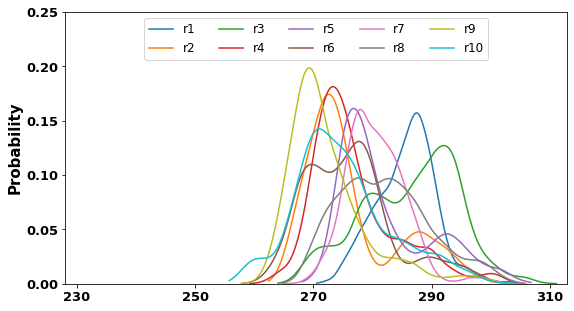

In [17]:
# R_open
sns.set_context({'figure.figsize':[9, 5]})
for i in range(0,10):
    sns.histplot(r_o[i], kde=True, stat='probability',bins=20,shrink=0)
plt.legend(["r1","r2","r3","r4","r5",
            "r6","r7","r8","r9","r10"],
           loc="upper center",ncol=5,fontsize=12)
plt.ylabel("Probability",weight='bold',fontsize=15)
plt.xticks([230,250,270,290,310],weight='bold',fontsize=13)
plt.yticks([0.0,0.05,0.10,0.15,0.20,0.25],weight='bold',fontsize=13)
plt.xlim(228,313)
plt.savefig("/home/dldx/R-H/code/classification/ML/plot/fig6/D/R_open_sasa.jpg",dpi=900)

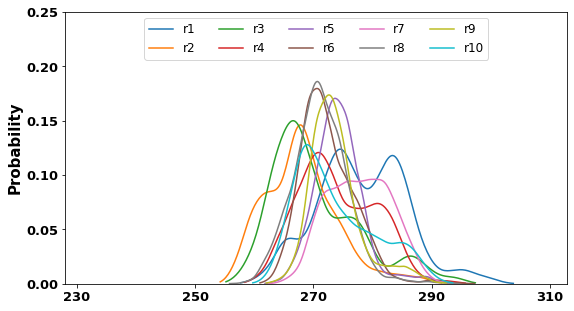

In [18]:
# H_open
sns.set_context({'figure.figsize':[9, 5]})
for i in range(0,10):
    sns.histplot(h_o[i], kde=True, stat='probability',bins=20,shrink=0)
plt.legend(["r1","r2","r3","r4","r5",
            "r6","r7","r8","r9","r10"],
           loc="upper center",ncol=5,fontsize=12)
plt.ylabel("Probability",weight='bold',fontsize=15)
plt.xticks([230,250,270,290,310],weight='bold',fontsize=13)
plt.yticks([0.0,0.05,0.10,0.15,0.20,0.25],weight='bold',fontsize=13)
plt.xlim(228,313)
plt.savefig("/home/dldx/R-H/code/classification/ML/plot/fig6/D/H_open_sasa.jpg",dpi=900)

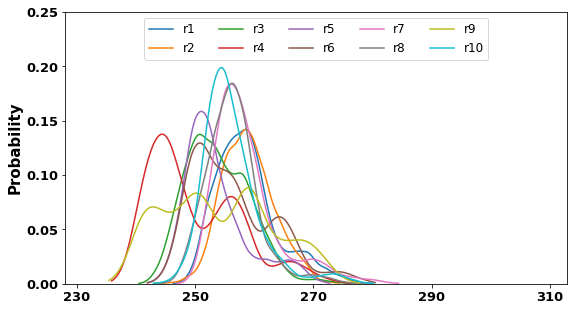

In [19]:
# R_close
sns.set_context({'figure.figsize':[9, 5]})
for i in range(0,10):
    sns.histplot(r_c[i], kde=True, stat='probability',bins=20,shrink=0)
plt.legend(["r1","r2","r3","r4","r5",
            "r6","r7","r8","r9","r10"],
           loc="upper center",ncol=5,fontsize=12)
plt.ylabel("Probability",weight='bold',fontsize=15)
plt.xticks([230,250,270,290,310],weight='bold',fontsize=13)
plt.yticks([0.0,0.05,0.10,0.15,0.20,0.25],weight='bold',fontsize=13)
plt.xlim(228,313)
plt.savefig("/home/dldx/R-H/code/classification/ML/plot/fig6/D/R_close_sasa.jpg",dpi=900)

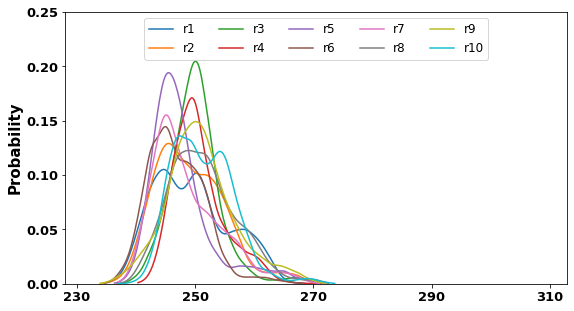

In [20]:
# H_close
sns.set_context({'figure.figsize':[9, 5]})
for i in range(0,10):
    sns.histplot(h_c[i], kde=True, stat='probability',bins=20,shrink=0)
plt.legend(["r1","r2","r3","r4","r5",
            "r6","r7","r8","r9","r10"],
           loc="upper center",ncol=5,fontsize=12)
plt.ylabel("Probability",weight='bold',fontsize=15)
plt.xticks([230,250,270,290,310],weight='bold',fontsize=13)
plt.yticks([0.0,0.05,0.10,0.15,0.20,0.25],weight='bold',fontsize=13)
plt.xlim(228,313)
plt.savefig("/home/dldx/R-H/code/classification/ML/plot/fig6/D/H_close_sasa.jpg",dpi=900)